In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']  = (10, 6)

In [106]:
x_data = np.random.rand(100).astype(np.float32)

In [116]:
a = 3
b = 2
y_data = a * x_data + b
y_data = np.vectorize(lambda y: y+np.random.normal(loc=0.0, scale=0.3))(y_data)

In [117]:
print('Sample points:',list(zip(x_data, y_data))[0:5])

Sample points: [(0.039563265, 2.4444193168827808), (0.048230954, 2.058696891386016), (0.16065456, 2.8984075888025331), (0.69139093, 3.8776412109516509), (0.13093212, 2.1345230473461787)]


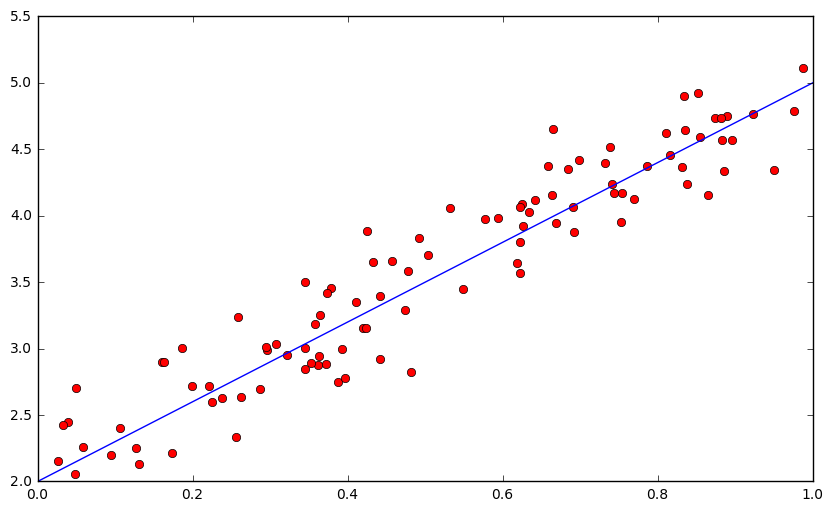

In [118]:
plt.plot(x_data, y_data, 'ro')
xx = np.linspace(0, 1, 100)
plt.plot(xx, a*xx+b)

## Linear Regression in TensorFlow

In [122]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)
y = a * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

In [123]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


In [124]:
## initialize variables
init_op = tf.initialize_all_variables()


In [125]:
session = tf.Session()
session.run(init_op)

In [126]:
train_data = []
for step in range(200):
    evals = session.run([train, a, b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [0.0, 0.0]
5 [1.8625882, 2.6558216]
10 [2.1128745, 2.5152068]
15 [2.3039403, 2.4122403]
20 [2.4484122, 2.3343766]
25 [2.5576551, 2.2754996]
30 [2.6402595, 2.2309797]
35 [2.7027211, 2.1973159]
40 [2.7499518, 2.1718607]
45 [2.7856655, 2.1526127]
50 [2.8126705, 2.1380584]
55 [2.8330905, 2.127053]
60 [2.848531, 2.1187313]
65 [2.8602061, 2.1124387]
70 [2.8690345, 2.1076808]
75 [2.8757102, 2.1040828]
80 [2.880758, 2.1013625]
85 [2.8845747, 2.0993054]
90 [2.8874607, 2.0977499]
95 [2.8896432, 2.0965736]
100 [2.8912935, 2.0956843]
105 [2.8925412, 2.0950117]
110 [2.8934846, 2.0945034]
115 [2.8941982, 2.0941188]
120 [2.8947375, 2.093828]
125 [2.8951452, 2.0936084]
130 [2.8954537, 2.093442]
135 [2.8956869, 2.0933163]
140 [2.8958633, 2.0932212]
145 [2.8959968, 2.0931494]
150 [2.8960974, 2.0930951]
155 [2.8961737, 2.0930541]
160 [2.8962314, 2.0930228]
165 [2.8962753, 2.0929992]
170 [2.8963082, 2.0929816]
175 [2.8963332, 2.092968]
180 [2.8963521, 2.0929577]
185 [2.8963666, 2.0929501]
190 [2.8963773

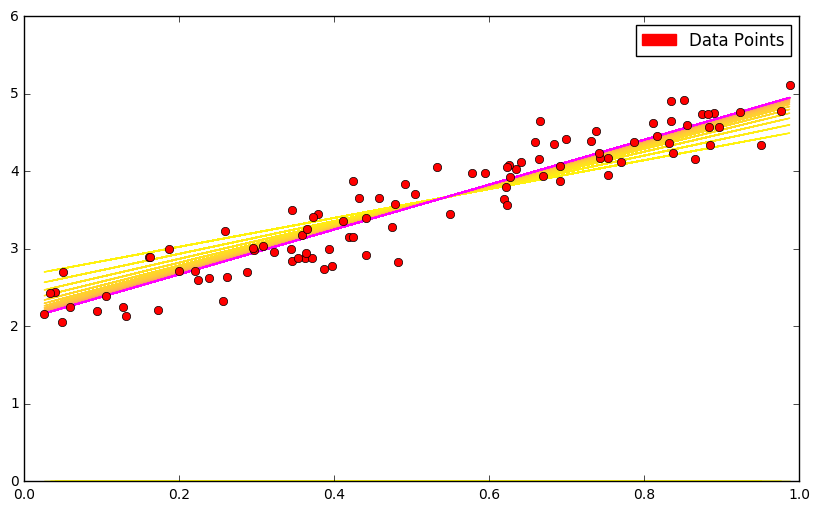

In [133]:
converters = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb  = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x : a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr, cg, cb))

green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.plot(x_data, y_data, 'ro')
plt.show()